## Author : Rohit Badgujar

### Subject : Data Science And Business Analytics Tasks ( GRIPSEPTEMBER21 )

# Step 1 : Problem Understanding

### Predict the Percentage of an student based on the no. of study hours. what will be predicted score if a student studies for 9.25 hrs/day?

# Step 2 : Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(url)

In [3]:
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Step 3 : Exploratory Data Analysis

In [4]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [6]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
dataset.shape

(25, 2)

In [9]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
dataset.min()

Hours      1.1
Scores    17.0
dtype: float64

In [12]:
dataset.max()

Hours      9.2
Scores    95.0
dtype: float64

In [13]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [15]:
dataset.iloc[5:20]

,Hours,Scores
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25
10,7.7,85
11,5.9,62
12,4.5,41
13,3.3,42
14,1.1,17


In [16]:
dataset.nunique()

Hours     23
Scores    23
dtype: int64

In [17]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step 4 :  Data Visualization

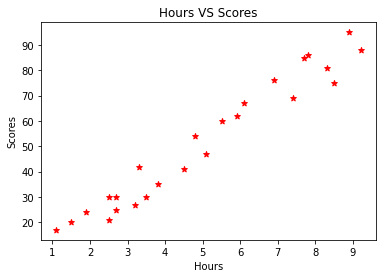

In [18]:
y = dataset['Scores']
x = dataset['Hours']
plt.title('Hours VS Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(x,y,color='red',marker='*')
plt.show()

# Step 5 : Data Preprocessing

In [19]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

# Step 6 : Model Training

In [20]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=1/3, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Mymodel = model.fit(xtrain,ytrain)

# Step 7 : Model Prediction

In [22]:
y_pred = Mymodel.predict(xtest)

In [23]:
print(y_pred)

[10.56351243 33.29165695 18.82829225 87.01272581 48.78811912 78.74794599
 62.21838634 75.64865355 35.3578519 ]


In [24]:
print(ytest)

[17 42 24 75 54 85 67 69 30]


In [25]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df

,Actual,Predicted
0,17,10.563512
1,42,33.291657
2,24,18.828292
3,75,87.012726
4,54,48.788119
5,85,78.747946
6,67,62.218386
7,69,75.648654
8,30,35.357852


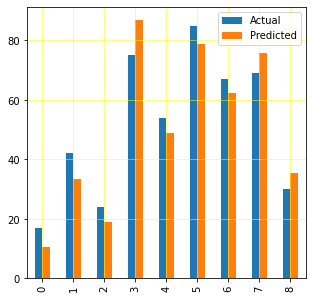

In [37]:
# Plotting the Bar graph to predict the difference between the actual and predicted value


df.plot(kind='bar', figsize=(5,5))
plt.grid(which='major', linewidth=0.5, color='yellow')
plt.grid(which='minor', linewidth=0.5, color='red')
plt.show()

In [26]:
Mymodel.predict([[9.25]])

array([94.7609569])

In [27]:
Mymodel.coef_

array([10.33097478])

In [28]:
Mymodel.intercept_

-0.8005598320504035

In [29]:
x = 9.25
y = (Mymodel.coef_)*(x) + (Mymodel.intercept_)
print(y)

[94.7609569]


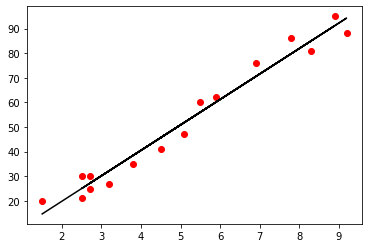

In [30]:
# Plotting the Line Of Regression

plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,Mymodel.predict(xtrain),color='black')

# Step 8 : Model Evaluation

In [34]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


mse = mean_squared_error(ytest,y_pred)
mae = mean_absolute_error(ytest,y_pred)
rmse = np.sqrt(mean_squared_error(ytest,y_pred))
a = r2_score(ytest,y_pred)


In [35]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'coefficient of determination (r2_score): {a}')

Mean Absolute Error: 6.731257577459277
Mean Squared Error: 50.03807060523176
Root Mean Squared Error: 7.073759297942768
coefficient of determination (r2_score): 0.9047140370739192


# Conclusion

### I have successfully Predict the Percentage of an student based on the no. of study hours using Supervised Machine Learning Model like Linear Regression and evaluate the model's performance on various parameters 